## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url
https://www.kaggle.com/noulam/tomato

In [37]:
import sys
from PIL import Image
sys.modules['Image'] = Image

from PIL import Image
print(Image.__file__)

import Image
print(Image.__file__)

C:\Users\srich\.conda\envs\ml\lib\site-packages\PIL\Image.py
C:\Users\srich\.conda\envs\ml\lib\site-packages\PIL\Image.py


In [62]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [39]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Tomato_leaf/train'
valid_path = 'Tomato_leaf/test'


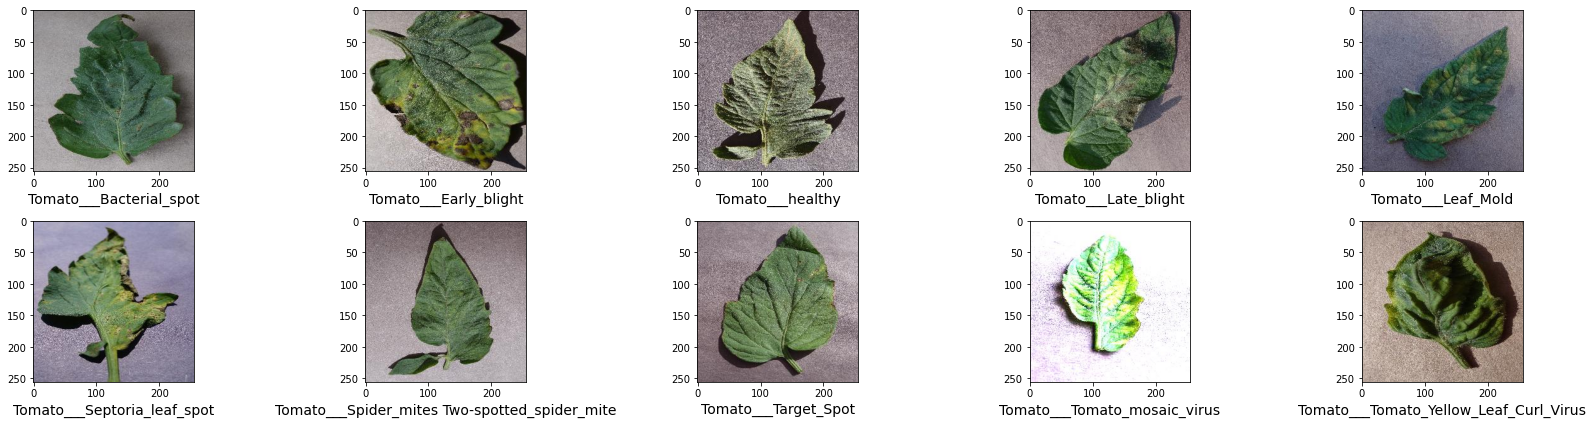

In [79]:
import os 
import random
leaf=[]
disease_name=[]
leaf_img=[]
disease_list=os.listdir(train_path)
i=0
fig=plt.figure(figsize=(24,6))
for disease in disease_list:
    sample=random.sample(os.listdir(train_path+"/"+disease),1)
    Im=load_img(train_path+"/"+disease+"/"+sample[0])
    plt.subplot(2,5,i+1)
    plt.imshow(Im)
    plt.xlabel(disease,fontsize=14)
    i=i+1
plt.tight_layout()


In [42]:


inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [43]:
# # don't train existing weights
for layer in inception.layers:
    layer.trainable = False
   

In [44]:
  # useful for getting number of output classes
folders = glob('Tomato_leaf/train/*')
folders

['Tomato_leaf/train\\Tomato___Bacterial_spot',
 'Tomato_leaf/train\\Tomato___Early_blight',
 'Tomato_leaf/train\\Tomato___healthy',
 'Tomato_leaf/train\\Tomato___Late_blight',
 'Tomato_leaf/train\\Tomato___Leaf_Mold',
 'Tomato_leaf/train\\Tomato___Septoria_leaf_spot',
 'Tomato_leaf/train\\Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato_leaf/train\\Tomato___Target_Spot',
 'Tomato_leaf/train\\Tomato___Tomato_mosaic_virus',
 'Tomato_leaf/train\\Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [45]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [46]:

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [47]:

# view the structure of the model
model.summary()


Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_282 (Conv2D)             (None, 111, 111, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_282 (BatchN (None, 111, 111, 32) 96          conv2d_282[0][0]                 
__________________________________________________________________________________________________
activation_282 (Activation)     (None, 111, 111, 32) 0           batch_normalization_282[0][0]    
_______________________________________________________________________________________

In [48]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [8]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Tomato_leaf/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [10]:
test_set = test_datagen.flow_from_directory('Tomato_leaf/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [11]:
print(training_set.class_indices)

labels=dict((y,x) for x,y in training_set.class_indices.items())
print(labels)

{'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9}
{0: 'Tomato___Bacterial_spot', 1: 'Tomato___Early_blight', 2: 'Tomato___Late_blight', 3: 'Tomato___Leaf_Mold', 4: 'Tomato___Septoria_leaf_spot', 5: 'Tomato___Spider_mites Two-spotted_spider_mite', 6: 'Tomato___Target_Spot', 7: 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 8: 'Tomato___Tomato_mosaic_virus', 9: 'Tomato___healthy'}


In [12]:
from collections import Counter
count=Counter(training_set.classes)
print(count)

Counter({7: 1961, 9: 1926, 1: 1920, 3: 1882, 2: 1851, 6: 1827, 8: 1790, 4: 1745, 5: 1741, 0: 1702})


                                      0     1
0                        Bacterial_spot  1702
1                          Early_blight  1920
2                           Late_blight  1851
3                             Leaf_Mold  1882
4                    Septoria_leaf_spot  1745
5  Spider_mites Two-spotted_spider_mite  1741
6                           Target_Spot  1827
7         Tomato_Yellow_Leaf_Curl_Virus  1961
8                   Tomato_mosaic_virus  1790
9                               healthy  1926


Text(0.5, 0, 'Image count')

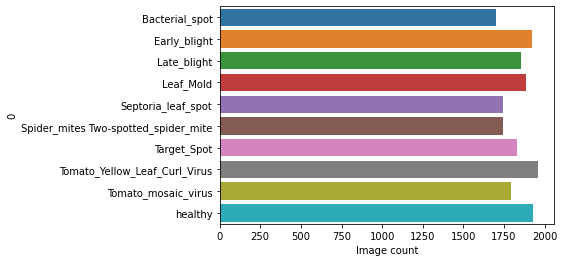

In [13]:
import seaborn as sns
import pandas as pd
res={}
for k,v in labels.items():
    res[v]=count[k]
df=pd.DataFrame(res.items())
df.iloc[:,0] =  df.iloc[:,0].apply(lambda x: x[9:])
print(df)
pt=sns.barplot(x=1,y=0,data=df)
pt.set_xlabel('Image count')


In [56]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=True)


In [57]:
# fit the model
# Run the cell. It will take some time to execute

r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=40,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=[early_stop]
)

Epoch 1/40
574/574 [==============================] - 2978s 5s/step - loss: 2.6775 - accuracy: 0.6887 - val_loss: 2.2403 - val_accuracy: 0.7483
Epoch 2/40
574/574 [==============================] - 2878s 5s/step - loss: 2.2474 - accuracy: 0.7869 - val_loss: 2.5315 - val_accuracy: 0.7806
Epoch 3/40
574/574 [==============================] - 2890s 5s/step - loss: 2.0947 - accuracy: 0.8178 - val_loss: 2.8413 - val_accuracy: 0.7993
Epoch 4/40
574/574 [==============================] - 2721s 5s/step - loss: 1.9787 - accuracy: 0.8430 - val_loss: 2.2728 - val_accuracy: 0.8290
Epoch 5/40
574/574 [==============================] - 2117s 4s/step - loss: 1.9399 - accuracy: 0.8514 - val_loss: 2.3612 - val_accuracy: 0.8314
Epoch 6/40
574/574 [==============================] - 2102s 4s/step - loss: 1.8239 - accuracy: 0.8644 - val_loss: 3.0268 - val_accuracy: 0.8216
Epoch 7/40
574/574 [==============================] - 2080s 4s/step - loss: 1.8196 - accuracy: 0.8738 - val_loss: 2.2137 - val_accuracy:

In [58]:
import matplotlib.pyplot as plt

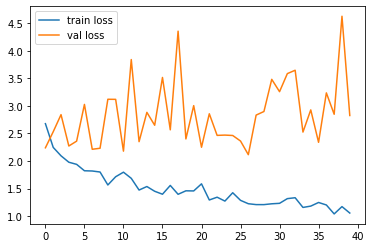

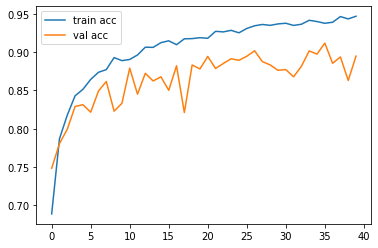

<Figure size 432x288 with 0 Axes>

In [59]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [115]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
loss = r.history['loss']
val_loss = r.history['val_loss']
epochs = range(1, len(loss) + 1)
print("Maximum Accuracy : {:.2f} %".format(max(acc)*100))
print("Maximum Validation Accuracy : {:.2f} %".format(max(val_acc)*100))

Maximum Accuracy : 94.70 %
Maximum Validation Accuracy : 91.19 %


In [60]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [61]:

y_pred = model.predict(test_set)


In [23]:
y_pred

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.16791758e-18, 2.86330871e-25, 1.21726176e-26, ...,
        1.42771117e-09, 4.23473597e-23, 4.16065873e-32],
       [2.73472789e-31, 5.37449483e-23, 1.58060031e-27, ...,
        1.94670290e-34, 0.00000000e+00, 9.98834789e-01],
       ...,
       [2.18325389e-35, 1.06155074e-37, 1.81755186e-26, ...,
        7.98238022e-14, 3.99904269e-30, 4.17284366e-35],
       [3.94555782e-20, 2.44286910e-30, 1.00000000e+00, ...,
        1.95955573e-38, 0.00000000e+00, 0.00000000e+00],
       [1.04744743e-22, 4.04692067e-08, 9.99999762e-01, ...,
        9.77111865e-21, 2.18101974e-30, 3.15607101e-34]], dtype=float32)

In [24]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [31]:
y_pred


array([7, 3, 9, 7, 6, 5, 0, 3, 7, 0, 9, 5, 0, 1, 2, 4, 8, 0, 6, 7, 6, 6,
       3, 5, 3, 2, 1, 7, 4, 1, 3, 9, 8, 9, 6, 6, 1, 8, 6, 8, 3, 0, 8, 2,
       5, 6, 9, 2, 0, 1, 0, 0, 7, 0, 0, 7, 5, 8, 3, 0, 7, 7, 9, 4, 7, 4,
       9, 4, 3, 8, 4, 9, 6, 9, 8, 1, 5, 3, 3, 9, 3, 6, 3, 8, 8, 3, 3, 0,
       6, 3, 8, 2, 7, 6, 8, 6, 2, 5, 1, 2, 0, 2, 8, 5, 3, 4, 3, 3, 7, 5,
       2, 8, 0, 7, 6, 9, 0, 7, 5, 0, 9, 7, 1, 8, 7, 3, 5, 5, 0, 7, 0, 9,
       8, 4, 2, 1, 7, 4, 7, 0, 7, 1, 8, 9, 5, 9, 3, 9, 8, 1, 2, 8, 4, 5,
       0, 1, 6, 9, 7, 5, 0, 0, 0, 8, 8, 4, 8, 3, 7, 3, 3, 1, 8, 5, 6, 2,
       7, 3, 7, 4, 1, 2, 9, 3, 1, 7, 0, 8, 3, 0, 7, 0, 3, 3, 8, 7, 9, 4,
       7, 8, 0, 7, 6, 1, 4, 9, 6, 1, 0, 2, 6, 7, 0, 5, 3, 9, 8, 7, 7, 0,
       4, 3, 3, 5, 5, 4, 0, 0, 3, 8, 1, 0, 8, 0, 3, 5, 5, 3, 2, 4, 5, 2,
       6, 2, 4, 3, 2, 5, 0, 8, 6, 4, 2, 1, 3, 3, 6, 0, 6, 5, 4, 5, 5, 9,
       9, 6, 8, 0, 7, 8, 5, 8, 1, 7, 0, 0, 3, 9, 7, 8, 2, 7, 0, 8, 9, 7,
       0, 9, 8, 2, 4, 0, 6, 5, 1, 2, 8, 3, 2, 2, 7,

In [5]:
from tensorflow.keras.models import load_model
model_test=load_model('model_inception.h5')

In [16]:
import cv2
import numpy as np
def preprocess_img(file_path):
    img_array=cv2.imread(file_path,cv2.IMREAD_COLOR)
    img_array=img_array/255
    new_array=cv2.resize(img_array,(224,224))
    return new_array.reshape(-1,224,224,3)
def prediction(img):
    x=model_test.predict(img)
    print(x)
    pred_res=np.argmax(x)
    return labels[pred_res]

file_path='A:\\Coding\\ML\\Tomato-Leaf-Disease-Prediction\\Tomato_leaf\\val\\Tomato___healthy\\0c8c9c80-b7e0-47a7-81d3-b5a2174e545d___GH_HL Leaf 496.1_180deg.JPG'

img=preprocess_img(file_path=file_path)
prediction(img)

[[1.7812709e-22 1.0036147e-37 7.8326389e-07 3.1492622e-19 2.9654670e-24
  2.3732529e-36 4.5767303e-28 0.0000000e+00 0.0000000e+00 9.9999917e-01]]


'Tomato___healthy'